In [181]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
def b(tau):
    return (3/4)*1*(tau + 2/3)

In [215]:
def func(mu,w):

    N = 1000
    mu = mu
    tau = np.linspace(0,20,N)
    
    dtau = tau[1] - tau[0]
    mu2 = mu**2
    dt2 = dtau**2
    
    a = mu2/dt2
    d = 1 + (2*mu2)/dt2
    c = mu2/dt2
    
    d5 = 0.5 + (mu/dtau)
    a5 = (mu/dtau) - 0.5
    d0 = 1 + (mu/dtau) + (dtau/(2*mu))
    c0 = mu/dtau
    
    A = np.zeros((N, N))
    svals = np.zeros(N)
    coeffs = np.array([-a, d, -c])
    
    A[0,0] = d0
    A[0,1] = -c0
    A[-1,-1] = d5
    A[-1,-2] = -a5
    svals[0] = (b(tau[0])*dtau)/(2*mu)
    svals[-1] = (b(tau[-1])*(0.5 + (mu/dtau)) + b(tau[-2])*(0.5 - (mu/dtau)))
    
    i = 1
    s = 0
    while i < N - 1:
        A[i, s:s+3] += coeffs
        svals[i] = b(tau[i])
        i += 1
        s += 1
    
    u = np.linalg.solve(A, svals)
    
    upr = np.zeros(N)
    for i in range(1, len(tau) -1):
        upr[i] = (u[i+1] - u[i-1])/(2*dtau)
    
    upr[0] = (4*u[1] - 3*u[0] - u[2])/(2*dtau)
    upr[-1] = (3*u[-1] + u[-3] - 4*u[-2])/(2*dtau)
    flux = 4*w*(mu**2)*upr
    uvals = w*u
    
    return tau, flux

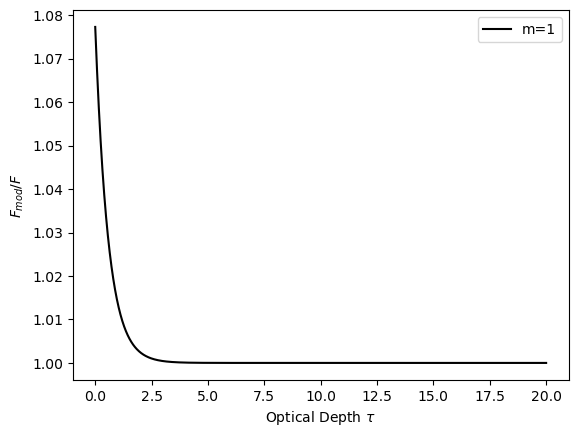

In [216]:
# m = 1
taum1, fluxm1 = func(0.5773502691896257, 1.0)
plt.plot(taum1, fluxm1, label='m=1', color='k')
plt.xlabel(r'Optical Depth $\tau$')
plt.ylabel(r'$F_{mod}/F$')
plt.legend()

In [217]:
# m = 3
# tau1, flux1 = func(0.6612093864662645,0.3607615730481386)
# tau2, flux2 = func(0.2386191860831969,0.4679139345726910)
# tau3, flux3 = func(0.9324695142031521,0.1713244923791704)

tau1, flux1 = func(0.4058451513773972,0.3818300505051189)
tau2, flux2 = func(0.7415311855993945,0.2797053914892766)
tau3, flux3 = func(0.9491079123427585,0.1294849661688697)

In [218]:
flux = (flux1 + flux2 + flux3)

Text(0, 0.5, 'Model flux $F$')

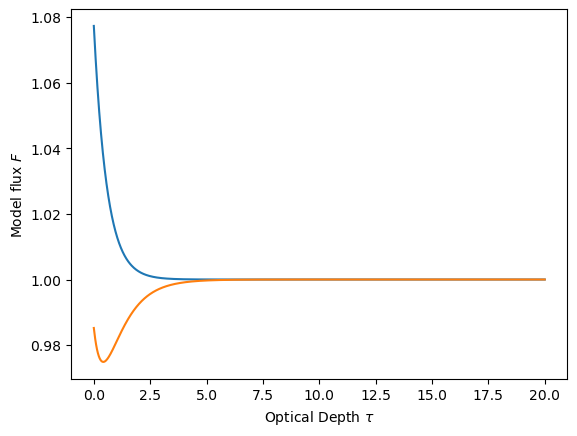

In [219]:
# plt.plot(tau1, flux1,'--k')
# plt.plot(tau2, flux2,'--k')
# plt.plot(tau3, flux3,'--k')
plt.plot(taum1, fluxm1)
plt.plot(tau1, flux)
plt.xlabel(r'Optical Depth $\tau$')
plt.ylabel(r'Model flux $F$')

In [220]:
# m = 5
tau6, flux6 = func(0.1488743389816312,0.2955242247147529)
tau7, flux7 = func(0.4333953941292472,0.2692667193099963)
tau8, flux8 = func(0.6794095682990244,0.2190863625159820)
tau9, flux9 = func(0.8650633666889845,0.1494513491505806)
tau10, flux10 = func(0.9739065285171717,0.0666713443086881)

In [221]:
flux5v = flux6 + flux7 + flux8 + flux9 + flux10

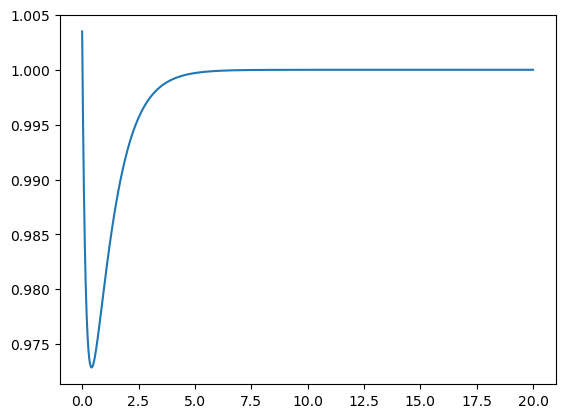

In [222]:
plt.plot(tau1,flux5v)

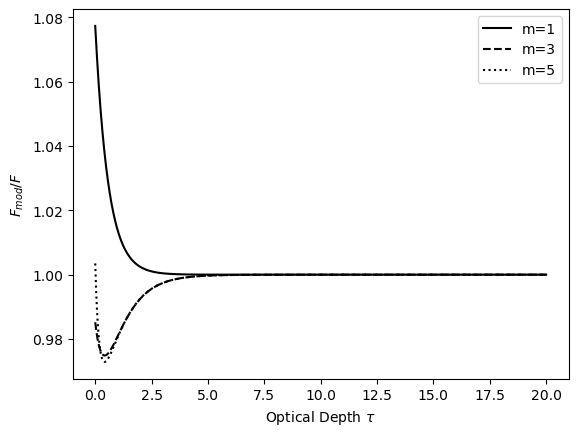

In [241]:
plt.plot(taum1, fluxm1, color='k', linestyle='solid', label='m=1')
plt.plot(tau1, flux, color='k', linestyle='dashed', label='m=3')
plt.plot(tau1,flux5v, color='k', linestyle='dotted', label='m=5')
plt.xlabel(r'Optical Depth $\tau$')
plt.ylabel(r'$F_{mod}/F$')
plt.legend()

In [224]:
# m = 5
tau12, flux12 = func(0.2011940939974345,0.1984314853271116)
tau13, flux13 = func(0.3941513470775634,0.1861610000155622)
tau14, flux14 = func(0.5709721726085388,0.1662692058169939)
tau15, flux15 = func(0.7244177313601701,0.1395706779261543)
tau16, flux16 = func(0.8482065834104272,0.1071592204671719)
tau17, flux17 = func(0.9372733924007060,0.0703660474881081)
tau18, flux18 = func(0.9879925180204854,0.0307532419961173)

In [225]:
flux7val = flux12 + flux13 + flux14 + flux15 + flux16 + flux17 + flux18

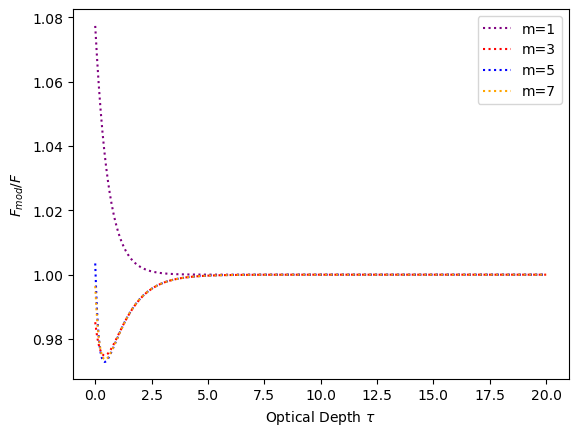

In [251]:
plt.plot(taum1, fluxm1, color='purple', linestyle='dotted', label='m=1')
plt.plot(tau1, flux, color='red', linestyle='dotted', label='m=3')
plt.plot(tau1,flux5v, color='blue', linestyle='dotted', label='m=5')
plt.plot(tau1,flux7val, color='orange', linestyle='dotted', label='m=7')
plt.xlabel(r'Optical Depth $\tau$')
plt.ylabel(r'$F_{mod}/F$')
plt.legend()